## ***REGRESION LOGISTICA***

### - Con Python - 


Qué es la Regresión Logística?

La regresión logística es un modelo de Machine Learning utilizado para resolver problemas de clasificación. Ayuda a predecir resultados binarios (como Sí/No) o multiclasificación (como un número finito de etiquetas).

Se aplica en casos como:

- Diagnóstico médico (¿Enfermo/Sano?)
- Análisis de fraudes financieros
- Predicción de abandono escolar (¿Abandona/No abandona?)

In [2]:
# Librerias necesarias
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [3]:
# Traemos los datos 
datos = pd.read_csv("Data/usuarios_win_mac_lin.csv")

# Creamos un punto de reinicio
df = pd.DataFrame(datos)

# Observamos nuestros Dataframe
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [ ]:
# Vemos las clases
print(df.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


##### Los datos que tenemos fueron extraidos de un ejercicio ya hecho, nuestro trabajo es practicarlo  --Fuente_original--> `aprendamachinelearning` 

Nuestra información de entrada son 4 características que tomé de una web que utiliza Google Analytics y son:

- Duración de la visita en Segundos
- Cantidad de Páginas Vistas durante la Sesión
- Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
- Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)
- Como la salida es discreta, asignaremos los siguientes valores a las 

Etiquetas:

0 – Windows
1 – Macintosh
2 -Linux

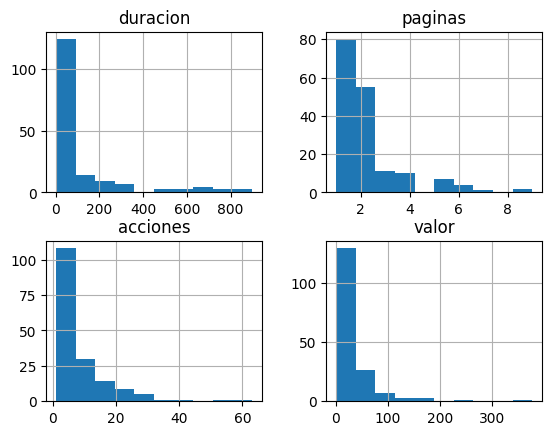

In [6]:
df.drop(['clase'],axis=1).hist()
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


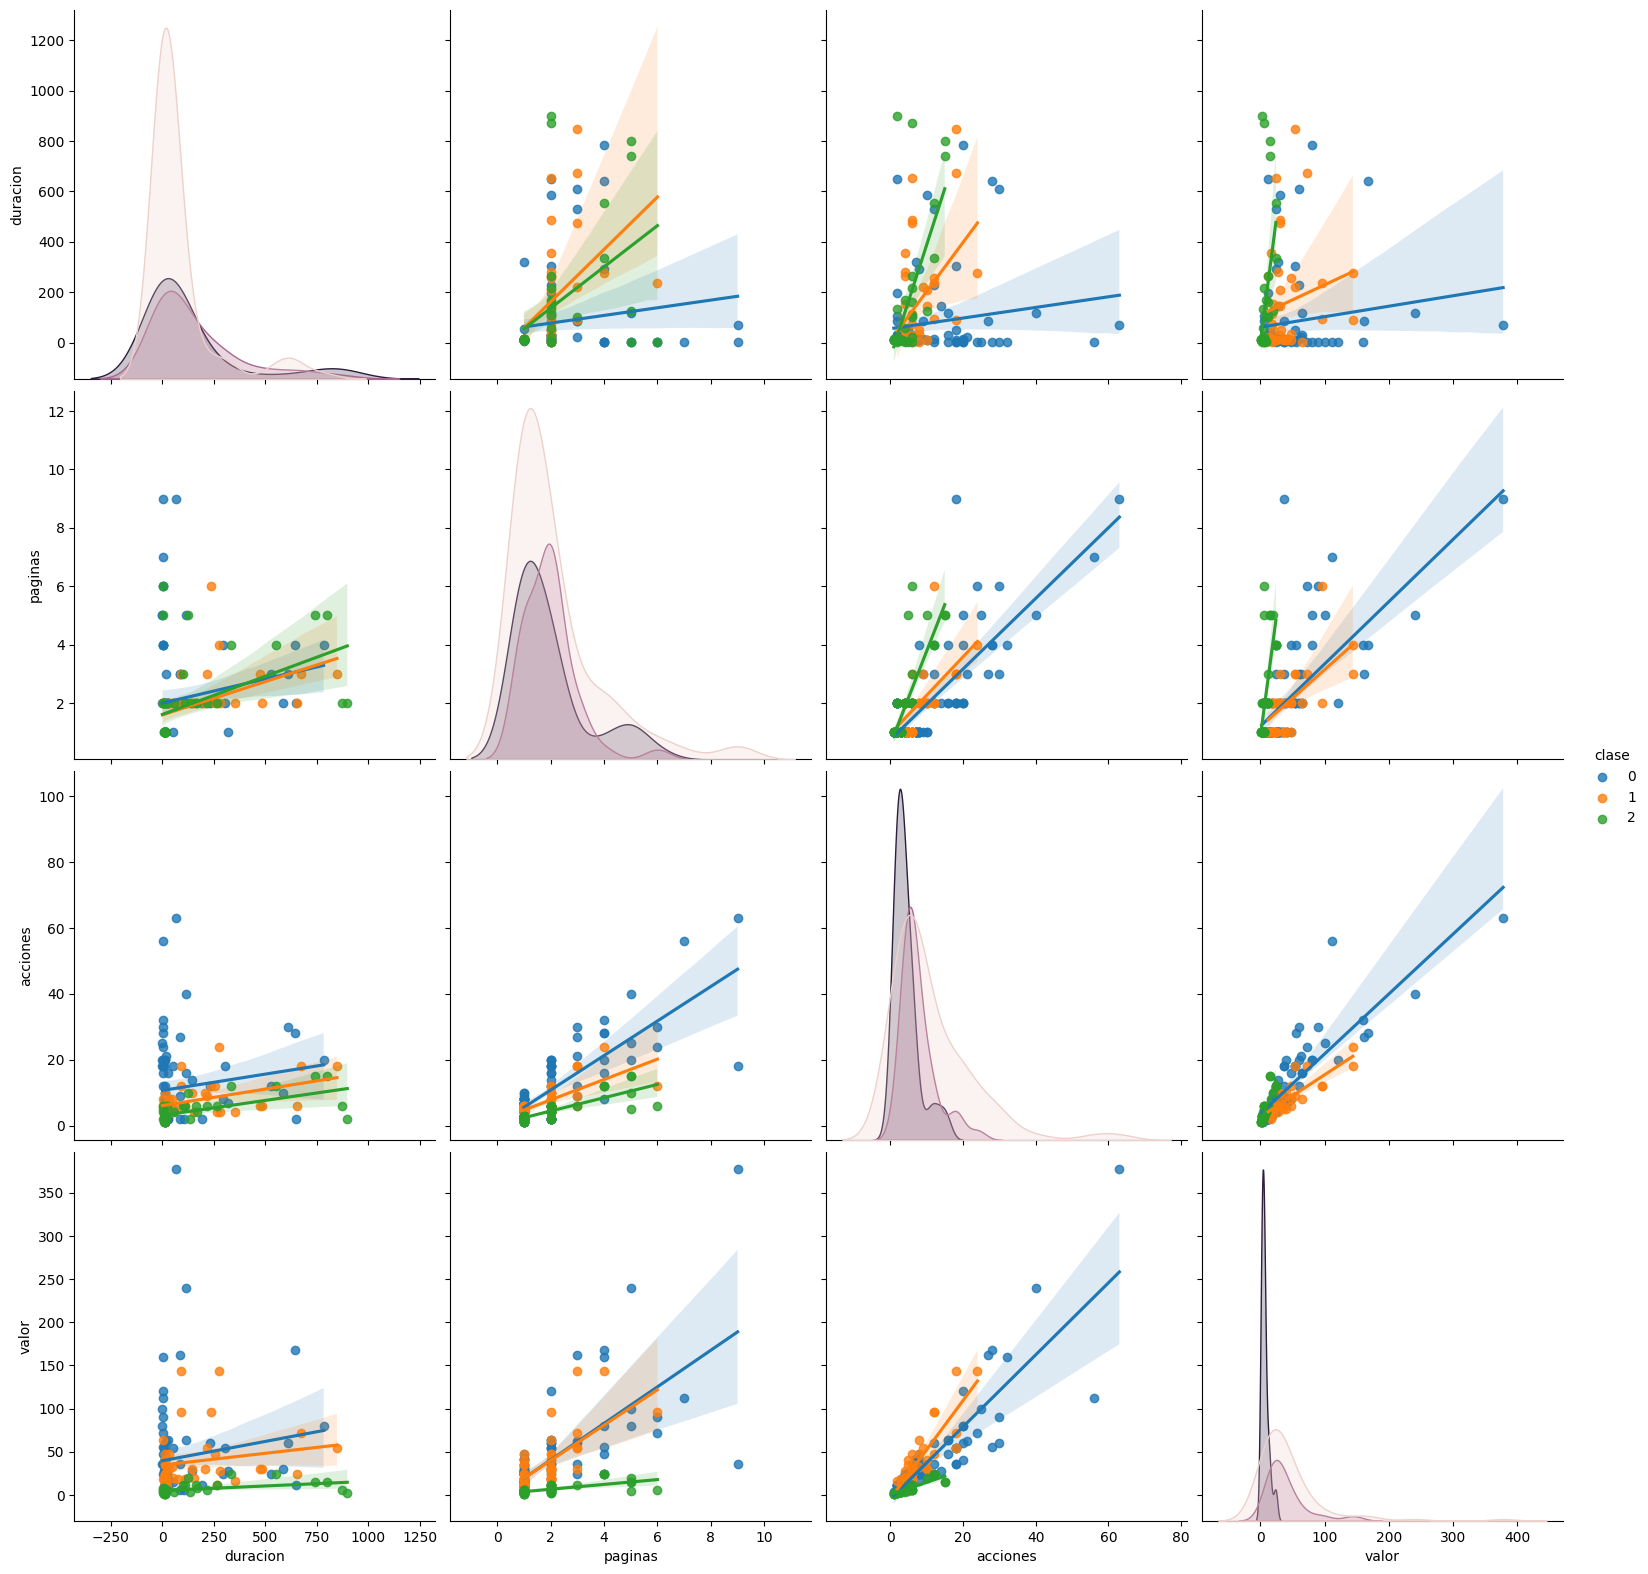

In [7]:
sb.pairplot(df.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [ ]:
# Separamos nuestros datos, variables predictoras (x) y objectivo (y)
X = np.array(df.drop(['clase'],axis=1)) # Columnas predictoras
y = np.array(df['clase'])  # Columna Objectivo
X.shape

(170, 4)

In [11]:
X

array([[  7.   ,   2.   ,   4.   ,   8.   ],
       [ 21.   ,   2.   ,   6.   ,   6.   ],
       [ 57.   ,   2.   ,   4.   ,   4.   ],
       [101.   ,   3.   ,   6.   ,  12.   ],
       [109.   ,   2.   ,   6.   ,  12.   ],
       [125.   ,   5.   ,  10.   ,  20.   ],
       [133.   ,   2.   ,   2.   ,   4.   ],
       [162.   ,   2.   ,   6.   ,  12.   ],
       [170.   ,   2.   ,   4.   ,   8.   ],
       [217.   ,   2.   ,   6.   ,   6.   ],
       [266.   ,   2.   ,   6.   ,  12.   ],
       [335.   ,   4.   ,  12.   ,  24.   ],
       [553.   ,   4.   ,  12.   ,  24.   ],
       [798.   ,   5.   ,  15.   ,  15.   ],
       [872.   ,   2.   ,   6.   ,   6.   ],
       [  1.105,   2.   ,   4.   ,   8.   ],
       [  2.091,   5.   ,   5.   ,   5.   ],
       [ 21.   ,   2.   ,   4.   ,  12.   ],
       [ 33.   ,   2.   ,   8.   ,  48.   ],
       [ 49.   ,   2.   ,   8.   ,  32.   ],
       [ 74.   ,   2.   ,   6.   ,  18.   ],
       [ 93.   ,   2.   ,  12.   ,  96.   ],
       [14

In [9]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# Creamos el modelo - model = linear_model.LogisticRegression()
model = linear_model.LogisticRegression(
    penalty='l2',          # Regularización estándar
    solver='lbfgs',        # Eficiente para grandes datasets
    C=1.0,                 # Regularización moderada
    max_iter=500,          # Iteraciones adicionales para convergencia
    multi_class='auto' # Estrategia para multiclase
)

In [13]:
# Entrenamos el modelo
model.fit(X,y)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='auto')

In [ ]:
# # Hacemos clasificar todo el nuestro conjunto de datos de entrada X
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


In [16]:
print(predictions.shape)

(170,)


In [17]:
# Verficamos si el modelo es bueno prediciendo
model.score(X,y)

0.7764705882352941

Tenemos 77% podemos decir que es medio

In [23]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [27]:
X_train.shape

(136, 4)

In [25]:
X_validation.shape

(34, 4)

In [26]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

In [28]:
print(msg)

Logistic Regression: 0.720330 (0.151123)


In [29]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [30]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [ ]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2])